In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import geopandas as gpd

eventsData = pd.read_csv(r"C:\Users\brian\Desktop\Datos\Nueva carpeta\Datos-master\Datos-master\fiuba-trocafone-tp1-final-set\events.csv",low_memory = False)

#Archivo con la plantilla
shapeBrasil= r'C:\Users\brian\Desktop\Datos\Nueva carpeta\Brazil_Admin_1.shp'
mapaBrasil = gpd.read_file(shapeBrasil)


In [2]:
#Creacion del data frame que contiene la cantidad de eventos por region.
DataFrameAuxiliar = pd.DataFrame(eventsData["region"].value_counts())
DataFrameAuxiliar = DataFrameAuxiliar.drop(['Unknown'])
DataFrameAuxiliar.columns = ['cantidad de eventos']

merged = mapaBrasil.set_index('NAME_1').join(DataFrameAuxiliar)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


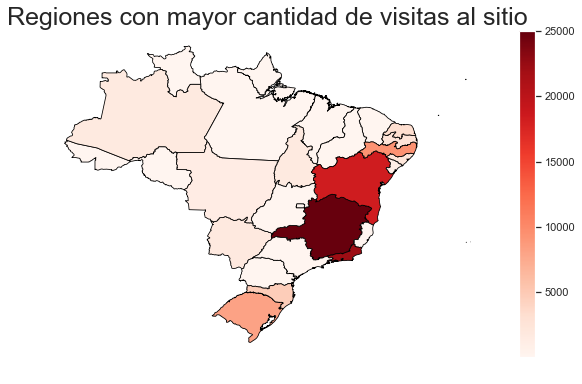

In [250]:
#Creacion de la visualizacion
#Plot basico
variable = 'cantidad de eventos'
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Reds', linewidth= 0.8 , ax=ax, edgecolor= '0.0')
#Le saco los ejes
ax.axis('off')
#Titulo
ax.set_title('Regiones con mayor cantidad de visitas al sitio', fontdict={'fontsize': '25', 'fontweight' : '3'})
#Barra indicadora
vmin, vmax = 10, 25000
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
#fig.savefig(“map_export.png”, dpi=300)

In [4]:
#Funcion que pasa a formato datetime las fechas que recibimos.
def datetime(date,format_string):
    return pd.to_datetime(date,format= format_string,errors='coerce')


In [90]:
#Aca tengo la cantidad de ventas por condicion AGREGAR FUNCION QUE HAGA ESTO
nuevoSetCondition = eventsData[eventsData['event']== 'checkout'].groupby(['condition','model']).count()
nuevoSetCondition = nuevoSetCondition.reset_index()
nuevoSetCondition = nuevoSetCondition.sort_values('event',ascending = False)

setIphone6 = nuevoSetCondition[nuevoSetCondition['model']=='iPhone 6']
setIphone6.set_index('condition', inplace=True)
setIphone6['Iphone6']= setIphone6['event']
setIphone6 = setIphone6.iloc[:,22]


setGalaxyJ5 = nuevoSetCondition[nuevoSetCondition['model']=='Samsung Galaxy J5']
setGalaxyJ5.set_index('condition', inplace=True)
setGalaxyJ5['GalaxyJ5']= setGalaxyJ5['event']
setGalaxyJ5 = setGalaxyJ5.iloc[:,22]

setIphone5s = nuevoSetCondition[nuevoSetCondition['model']=='iPhone 5s']
setIphone5s.set_index('condition', inplace=True)
setIphone5s['Iphone5']= setIphone5s['event']
setIphone5s = setIphone5s.iloc[:,22]

setIphone6S = nuevoSetCondition[nuevoSetCondition['model']=='iPhone 6S']
setIphone6S.set_index('condition', inplace=True)
setIphone6S['Iphone6s']= setIphone6S['event']
setIphone6S = setIphone6S.iloc[:,22]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [239]:
import seaborn as sns
cols = ['Iphone6','GalaxyJ5','Iphone5','Iphone6s']
cols2 = ['Bom', 'Excelente', 'Muito Bom', 'Bom - Sem Touch ID']
list_of_series =[setIphone6.values, setGalaxyJ5.values, setIphone5s.values ,setIphone6S.values]
df = pd.DataFrame(list_of_series, columns=cols)
df['Iphone6s'] = df['Iphone6s'].fillna(0)
df['indice']=['Bom', 'Excelente', 'Muito Bom', 'Bom - Sem Touch ID']
df['modelos'] = cols
df = df.transpose()
df.columns = cols2
df = df.iloc[:4]
df['modelos'] = cols
df.head()

,Bom,Excelente,Muito Bom,Bom - Sem Touch ID,modelos
Iphone6,1537,1352,846,822,Iphone6
GalaxyJ5,824,377,729,780,GalaxyJ5
Iphone5,635,189,647,681,Iphone5
Iphone6s,299,0,522,25,Iphone6s


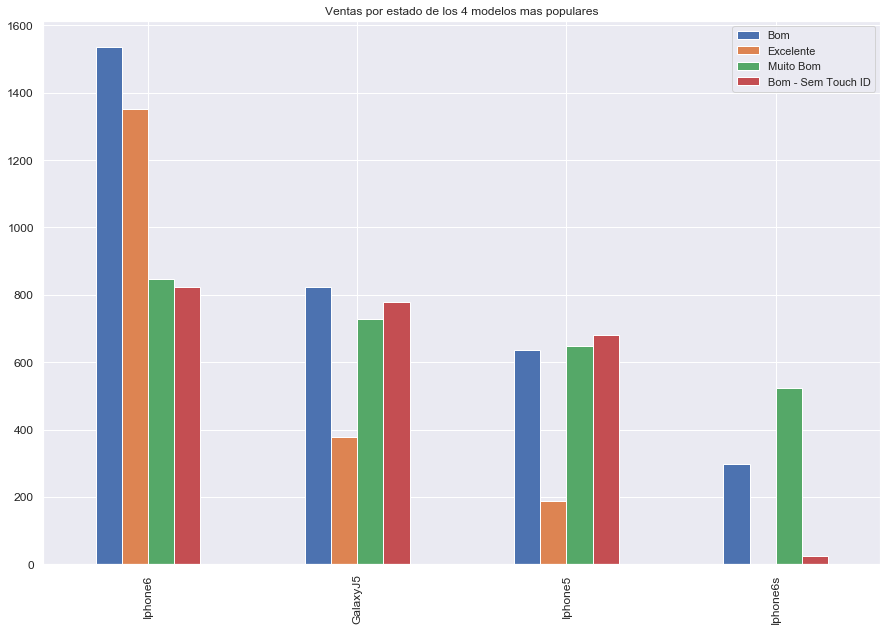

<Figure size 432x288 with 0 Axes>

In [248]:
ax = df[cols2].plot(kind='bar', title ="Ventas por estado de los 4 modelos mas populares", figsize=(15, 10), legend=True, fontsize=12)
plt.show()
f = plt.figure()

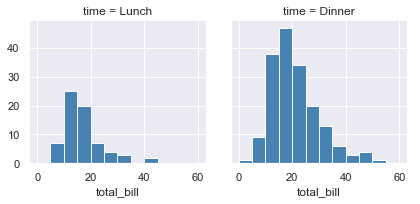

In [157]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
tips
g = sns.FacetGrid(tips, col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)



In [ ]:
eventsData.dtypes

Analisis exploratorio

Analisis de eventos

In [173]:
topEvents = eventsData["event"].value_counts()
topEvents

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

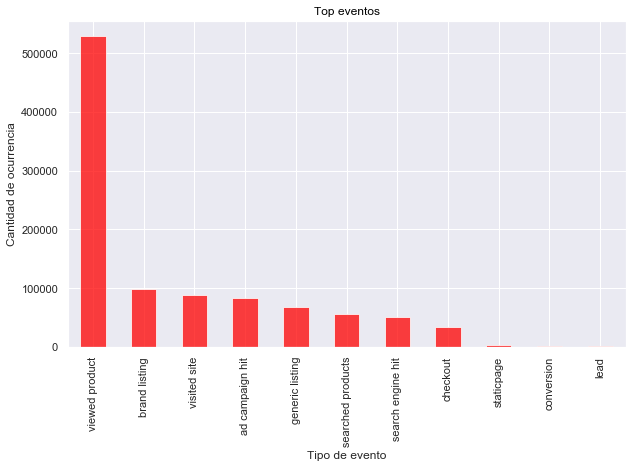

In [171]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Top eventos',color='black')

ax = topEvents.plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('Tipo de evento')
ax.set_ylabel("Cantidad de ocurrencia")
plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
#plt.savefig('Top10AreasConMasPostulaciones.png',bbox_inches='tight')



NameError: name 'topEvents' is not defined

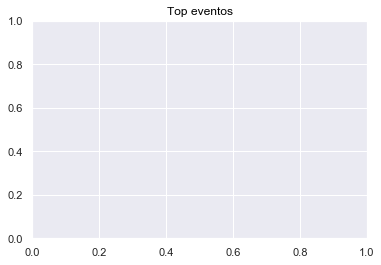

In [169]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Top eventos',color='black')

ax = topEvents.plot(kind='bar', figsize=(10,6), logy = True ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('Tipo de evento')
ax.set_ylabel("Cantidad de ocurrencia")
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('Topeventos',bbox_inches='tight')



Analisis de conversiones por sku

In [25]:
eventsSku = eventsData[["sku","event"]]

In [26]:
eventsSku["event"].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [27]:
eventsSku = eventsSku[eventsSku["event"] == "conversion"]

In [28]:
eventsSku["sku"].isnull().value_counts()

False    1172
Name: sku, dtype: int64

In [29]:
eventsSku["sku"].count()

1172

In [30]:
top5sku = eventsSku["sku"].value_counts()

In [31]:
top5sku[0:5]

6371.0    30
6370.0    18
7631.0    17
2692.0    16
3371.0    14
Name: sku, dtype: int64

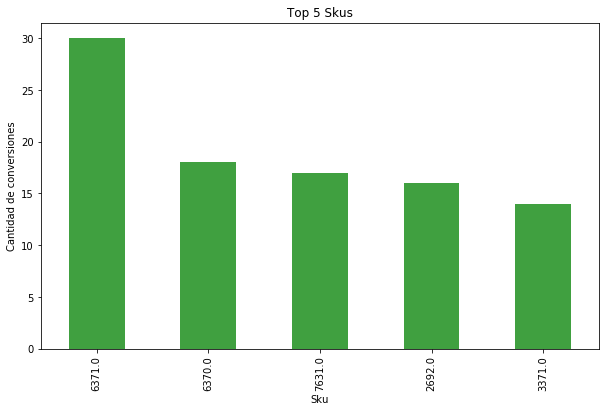

In [32]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Top 5 Skus',color='black')

ax = top5sku[0:5].plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )


ax.set_xlabel('Sku')
ax.set_ylabel("Cantidad de conversiones")
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('Top5skuns.png',bbox_inches='tight')



Analisis de actividad de usuarios

In [33]:
usersData = eventsData[["person","event"]]

In [34]:
usersData.head()

,person,event
0,0004b0a2,ad campaign hit
1,0004b0a2,visited site
2,0004b0a2,viewed product
3,0004b0a2,checkout
4,0006a21a,viewed product


In [35]:
top7users = usersData["person"].value_counts()

In [36]:
top7users = top7users[0:7]

In [37]:
top7users

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
Name: person, dtype: int64

In [38]:
top7users.keys()

Index(['71492f2b', '6b07be7b', '285101a1', '3e34b3cf', '2d5a84c1', '5f25cb5d',
       '5af7e2bc'],
      dtype='object')

In [39]:

usersData.head()

,person,event
0,0004b0a2,ad campaign hit
1,0004b0a2,visited site
2,0004b0a2,viewed product
3,0004b0a2,checkout
4,0006a21a,viewed product


In [40]:
personData = usersData[usersData["person"].isin(top7users.keys())]


In [41]:
top7users.keys()

Index(['71492f2b', '6b07be7b', '285101a1', '3e34b3cf', '2d5a84c1', '5f25cb5d',
       '5af7e2bc'],
      dtype='object')

In [42]:
personData["person"].value_counts().keys()

Index(['71492f2b', '6b07be7b', '285101a1', '3e34b3cf', '2d5a84c1', '5f25cb5d',
       '5af7e2bc'],
      dtype='object')

In [43]:
dataplot = personData

In [44]:
dataplot["event"].value_counts(normalize = True)

viewed product       0.534566
brand listing        0.257302
generic listing      0.078376
visited site         0.068060
ad campaign hit      0.035638
searched products    0.014135
search engine hit    0.004220
staticpage           0.003885
checkout             0.002880
conversion           0.000737
lead                 0.000201
Name: event, dtype: float64

In [45]:
dataplot["event"] = dataplot["event"].map({"viewed product": "viewed product", "brand listing": "brand listing", "generic listing":"generic listing", "visited site":"visited site", "ad campaign hit":"ad campaign hit", "searched products" : "others", "search engine hit":"others","staticpage":"others", "checkout": "others","conversion":"others","lead":"others"})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
dataplot["event"].value_counts()

viewed product     7980
brand listing      3841
generic listing    1170
visited site       1016
ad campaign hit     532
others              389
Name: event, dtype: int64

In [94]:

f = plt.figure()
df2 = dataplot.groupby(['person', 'event'],sort = True)['person'].count().unstack('event').fillna(0)
ax =df2.plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('top 7 usuarios con mas eventos')
ax.set_xlabel('Person id')
#ax.set_facecolor('xkcd:white')
ax.set_ylabel("Cantidad de eventos")
plt.show()
#plt.savefig('usuarios_top.png',bbox_inches='tight')

NameError: name 'dataplot' is not defined

<Figure size 432x288 with 0 Axes>

Analisis de modelos 

In [95]:
modelos = eventsData["model"].value_counts()

In [96]:
modelosvendidos = eventsData[eventsData["event"] == "conversion"]["model"].value_counts()

In [97]:
eventsData["timestamp"] = datetime(eventsData["timestamp"],"%Y-%m-%dT%H:%M:%S") 

In [98]:
eventsData["timestamp"].head()

0   2018-05-31 23:38:05
1   2018-05-31 23:38:05
2   2018-05-31 23:38:09
3   2018-05-31 23:38:40
4   2018-05-29 13:29:25
Name: timestamp, dtype: datetime64[ns]

In [99]:
years = eventsData["timestamp"].map(lambda x: x.year)

In [100]:
years.value_counts()

2018    1011288
Name: timestamp, dtype: int64

In [101]:
month = eventsData["timestamp"].map(lambda x: x.month)

In [102]:
month.value_counts()


5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: timestamp, dtype: int64

In [103]:
monthmodelssell = eventsData[["timestamp","model","event"]]

In [104]:
monthmodelssell.head()

,timestamp,model,event
0,2018-05-31 23:38:05,NaN,ad campaign hit
1,2018-05-31 23:38:05,NaN,visited site
2,2018-05-31 23:38:09,iPhone 5s,viewed product
3,2018-05-31 23:38:40,iPhone 5s,checkout
4,2018-05-29 13:29:25,Samsung Galaxy S8,viewed product


In [105]:
monthmodelssell["model"].isnull().value_counts()

False    564284
True     447004
Name: model, dtype: int64

In [106]:
monthmodelssell["month"] = monthmodelssell["timestamp"].map(lambda x: x.month)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
monthmodelssell["month"].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

In [108]:
monthconversionformodel = monthmodelssell[monthmodelssell["event"] == "conversion"]

In [109]:
monthconversionformodel.head()

,timestamp,model,event,month
220,2018-03-20 17:46:12,Motorola Moto X2,conversion,3
2282,2018-04-26 22:28:53,Samsung Galaxy Core Plus Duos TV,conversion,4
2547,2018-06-10 14:37:50,Samsung Galaxy S6 Flat,conversion,6
4245,2018-03-16 13:50:25,iPhone 5s,conversion,3
6985,2018-02-09 22:07:07,Samsung Galaxy J5,conversion,2


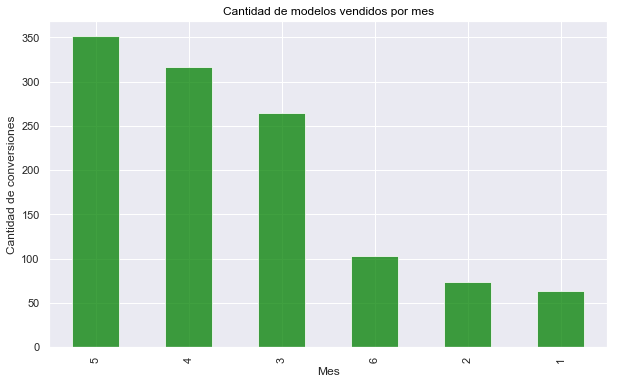

In [110]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Cantidad de modelos vendidos por mes',color='black')

ax = monthconversionformodel["month"].value_counts().plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )


ax.set_xlabel('Mes')
ax.set_ylabel("Cantidad de conversiones")
plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
#plt.savefig('Top5skuns.png',bbox_inches='tight')



In [111]:
daysell = monthmodelssell[monthmodelssell["event"] == "conversion"]

In [112]:
daysell.head()

,timestamp,model,event,month
220,2018-03-20 17:46:12,Motorola Moto X2,conversion,3
2282,2018-04-26 22:28:53,Samsung Galaxy Core Plus Duos TV,conversion,4
2547,2018-06-10 14:37:50,Samsung Galaxy S6 Flat,conversion,6
4245,2018-03-16 13:50:25,iPhone 5s,conversion,3
6985,2018-02-09 22:07:07,Samsung Galaxy J5,conversion,2


In [113]:
daysell["day"] = daysell["timestamp"].map(lambda x: x.day)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
daysell.head()

,timestamp,model,event,month,day
220,2018-03-20 17:46:12,Motorola Moto X2,conversion,3,20
2282,2018-04-26 22:28:53,Samsung Galaxy Core Plus Duos TV,conversion,4,26
2547,2018-06-10 14:37:50,Samsung Galaxy S6 Flat,conversion,6,10
4245,2018-03-16 13:50:25,iPhone 5s,conversion,3,16
6985,2018-02-09 22:07:07,Samsung Galaxy J5,conversion,2,9


In [115]:
daysell["weekday"] = daysell.apply(lambda x: dt.datetime.strftime(x['timestamp'], '%A'), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
daysell.head()

,timestamp,model,event,month,day,weekday
220,2018-03-20 17:46:12,Motorola Moto X2,conversion,3,20,Tuesday
2282,2018-04-26 22:28:53,Samsung Galaxy Core Plus Duos TV,conversion,4,26,Thursday
2547,2018-06-10 14:37:50,Samsung Galaxy S6 Flat,conversion,6,10,Sunday
4245,2018-03-16 13:50:25,iPhone 5s,conversion,3,16,Friday
6985,2018-02-09 22:07:07,Samsung Galaxy J5,conversion,2,9,Friday


In [117]:
daysell["weekday"].value_counts()

Tuesday      215
Thursday     200
Wednesday    189
Monday       184
Friday       175
Saturday     106
Sunday       103
Name: weekday, dtype: int64

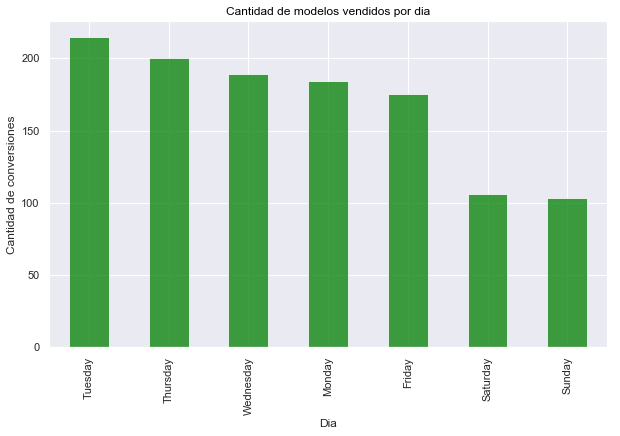

In [118]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Cantidad de modelos vendidos por dia',color='black')

ax = daysell["weekday"].value_counts().plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )


ax.set_xlabel('Dia')
ax.set_ylabel("Cantidad de conversiones")
plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
#plt.savefig('Top5skuns.png',bbox_inches='tight')



In [119]:
dayevents = monthmodelssell

In [120]:
dayevents["weekday"] = dayevents.apply(lambda x: dt.datetime.strftime(x['timestamp'], '%A'), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
dayevents.head()

,timestamp,model,event,month,weekday
0,2018-05-31 23:38:05,NaN,ad campaign hit,5,Thursday
1,2018-05-31 23:38:05,NaN,visited site,5,Thursday
2,2018-05-31 23:38:09,iPhone 5s,viewed product,5,Thursday
3,2018-05-31 23:38:40,iPhone 5s,checkout,5,Thursday
4,2018-05-29 13:29:25,Samsung Galaxy S8,viewed product,5,Tuesday


In [122]:
dayforevents = dayevents[["weekday","event"]]

In [123]:
dayforevents.head()

,weekday,event
0,Thursday,ad campaign hit
1,Thursday,visited site
2,Thursday,viewed product
3,Thursday,checkout
4,Tuesday,viewed product


In [124]:
dayforevents["count"] = 1
dayforevents.groupby(["weekday","event"]).count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count
weekday   event                   
Friday    ad campaign hit    12395
          brand listing      14731
          checkout            5244
          conversion           175
          generic listing     9761
          lead                  64
          search engine hit   7331
          searched products   8328
          staticpage           464
          viewed product     77947
          visited site       12931
Monday    ad campaign hit    11902
          brand listing      15067
          checkout            4621
          conversion           184
          generic listing    10236
          lead                  90
          search engine hit   7696
          searched products   8184
          staticpage           658
          viewed product     77653
          visited site       13094
Saturday  ad campaign hit     9493
          brand listing      11053
          checkout            3474
          conversion           106
          generic listing     7615
          lead                  45
          search engine hit   5871
          searched products   6586
...                            ...
Thursday  conversion           200
          generic listing    10603
          lead                  60
          search engine hit   7646
          searched products   8551
          staticpage           599
          viewed product     85396
          visited site       13784
Tuesday   ad campaign hit    13757
          brand listing      15997
          checkout            5928
          conversion           215
          generic listing    11037
          lead                  64
          search engine hit   8653
          searched products   8741
          staticpage           724
          viewed product     90410
          visited site       14494
Wednesday ad campaign hit    13357
          brand listing      16202
          checkout            5772
          conversion           189
          generic listing    11012
          lead                  75
          search engine hit   8110
          searched products   8776
          staticpage           574
          viewed product     86051
          visited site       14205

[77 rows x 1 columns]

In [125]:
hoursevents = monthmodelssell
hoursevents.head()

,timestamp,model,event,month,weekday
0,2018-05-31 23:38:05,NaN,ad campaign hit,5,Thursday
1,2018-05-31 23:38:05,NaN,visited site,5,Thursday
2,2018-05-31 23:38:09,iPhone 5s,viewed product,5,Thursday
3,2018-05-31 23:38:40,iPhone 5s,checkout,5,Thursday
4,2018-05-29 13:29:25,Samsung Galaxy S8,viewed product,5,Tuesday


Analsis por Id de usuario

In [126]:
hoursevents["hour"] = hoursevents["timestamp"].map(lambda x: x.hour)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
hoursevents.head()

,timestamp,model,event,month,weekday,hour
0,2018-05-31 23:38:05,NaN,ad campaign hit,5,Thursday,23
1,2018-05-31 23:38:05,NaN,visited site,5,Thursday,23
2,2018-05-31 23:38:09,iPhone 5s,viewed product,5,Thursday,23
3,2018-05-31 23:38:40,iPhone 5s,checkout,5,Thursday,23
4,2018-05-29 13:29:25,Samsung Galaxy S8,viewed product,5,Tuesday,13


In [128]:
hoursevents = hoursevents[["event","hour"]]
hoursevents.head()

,event,hour
0,ad campaign hit,23
1,visited site,23
2,viewed product,23
3,checkout,23
4,viewed product,13


In [129]:
hoursevents["hour"].value_counts().sort_index()

0     64378
1     58978
2     48536
3     33118
4     18838
5     11335
6      6257
7      3910
8      4623
9      8077
10    16639
11    32884
12    47426
13    55684
14    60211
15    58852
16    64637
17    60560
18    57614
19    58398
20    56378
21    58867
22    59412
23    65676
Name: hour, dtype: int64

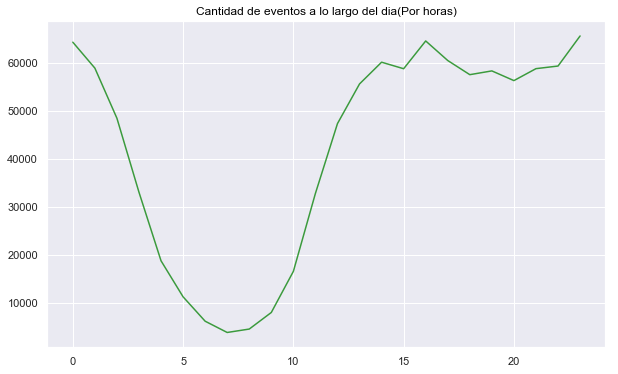

In [130]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Cantidad de eventos a lo largo del dia(Por horas)',color='black')

hoursevents["hour"].value_counts().sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='green' )

ax.set_xlabel('Hora')
ax.set_ylabel("Eventos")
plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
#plt.savefig('Top5skuns.png',bbox_inches='tight')




In [131]:
hourseventsconversion = hoursevents[hoursevents["event"] == "conversion"]
hourseventsconversion.head()

,event,hour
220,conversion,17
2282,conversion,22
2547,conversion,14
4245,conversion,13
6985,conversion,22


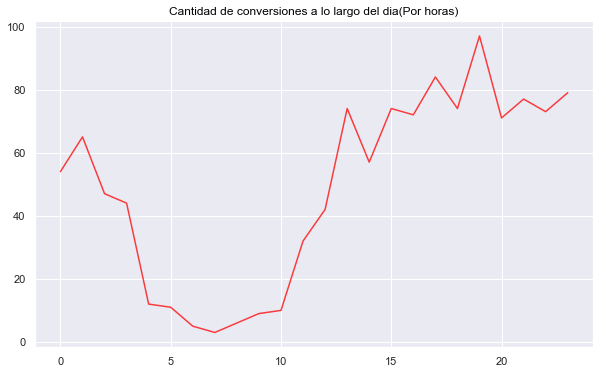

In [132]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Cantidad de conversiones a lo largo del dia(Por horas)',color='black')


hourseventsconversion["hour"].value_counts().sort_index().plot(kind='line', figsize=(10,6) ,alpha=0.75, color='red' )
ax.set_xlabel('Hora')
ax.set_ylabel("Eventos")
plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
#plt.savefig('Top5skuns.png',bbox_inches='tight')



Analisis segun la region/pais/ciudad 

In [133]:
eventsData["country"].isnull().value_counts()

True     923910
False     87378
Name: country, dtype: int64

In [134]:
eventsData["region"].isnull().value_counts()

True     923910
False     87378
Name: region, dtype: int64

In [135]:
eventsData["city"].isnull().value_counts()

True     923910
False     87378
Name: city, dtype: int64

In [136]:
eventsData["country"].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
Mozambique               12
United Kingdom           12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Italy                     7
Romania                   7
Russia                    6
Guadeloupe                6
Dominican Republic        6
Germany                   5
Colombia                  4
Bangladesh                4
Paraguay                  4
Switzerland               3
Angola                    2
Morocco                   2
India                     2
Belize                    1
Spain                     1
South Africa              1
Mexico                    1
China                     1
Uruguay                   1
Rwanda                    1
Cape Verde                1
Turkey                    1
Philippines         

In [137]:
eventsData["region"].value_counts()

Sao Paulo                           24996
Unknown                             14772
Minas Gerais                         7755
Rio de Janeiro                       6913
Bahia                                5737
Pernambuco                           2962
Ceara                                2829
Parana                               2602
Rio Grande do Sul                    2576
Federal District                     1739
Goias                                1564
Santa Catarina                       1511
Para                                 1382
Maranhao                             1303
Espirito Santo                       1257
Rio Grande do Norte                  1064
Paraíba                               875
Piaui                                 824
Alagoas                               751
Mato Grosso do Sul                    618
Amazonas                              600
Tocantins                             596
Mato Grosso                           487
Sergipe                           

In [138]:
eventsData["city"].value_counts()

Unknown                       15819
São Paulo                     11711
Rio de Janeiro                 3538
Belo Horizonte                 2568
Salvador                       2314
Brasília                       1530
Osasco                         1148
Curitiba                       1132
Fortaleza                      1084
Recife                          913
Goiânia                         853
Porto Alegre                    799
Guarulhos                       776
São Bernardo do Campo           716
Belém                           640
São Luís                        597
Manaus                          507
Natal                           487
Montes Claros                   482
Campinas                        471
Barueri                         466
Santo André                     434
Duque de Caxias                 429
Petrolina                       424
Teresina                        388
Sorocaba                        376
Campo Grande                    373
Maceió                      

Analisis con modelo y viewed

In [139]:
viewedmodel = eventsData[eventsData["event"] == "viewed product"]

In [140]:
viewedmodel["model"].value_counts()

iPhone 6                                     47538
iPhone 5s                                    42045
iPhone 6S                                    36930
iPhone 7                                     26330
Samsung Galaxy S7 Edge                       23062
Samsung Galaxy S7                            18085
iPhone 7 Plus                                17853
iPhone SE                                    15874
Samsung Galaxy S8                            15868
iPhone 6S Plus                               12250
iPhone 6 Plus                                12098
iPhone 5c                                    12049
Samsung Galaxy J5                            11036
Samsung Galaxy S6 Flat                       10724
Samsung Galaxy S6 Edge                       10580
Samsung Galaxy S8 Plus                       10006
iPhone 5                                      8846
Samsung Galaxy J7 Prime                       8400
Motorola Moto G4 Plus                         7522
Motorola Moto X Play 4G Dual   

In [141]:
dataCountry = eventsData[["timestamp","city","region","country"]]

In [142]:
dataCountry.head()

,timestamp,city,region,country
0,2018-05-31 23:38:05,NaN,NaN,NaN
1,2018-05-31 23:38:05,Camaragibe,Pernambuco,Brazil
2,2018-05-31 23:38:09,NaN,NaN,NaN
3,2018-05-31 23:38:40,NaN,NaN,NaN
4,2018-05-29 13:29:25,NaN,NaN,NaN


In [143]:
dataCountry["month"] = dataCountry["timestamp"].map(lambda x: x.month)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
dataCountry["month"].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

In [145]:
dataCountry.dropna(subset = ["country"])["month"].value_counts()

5    40137
6    22419
4    12650
3     7247
2     2790
1     2135
Name: month, dtype: int64

In [146]:
dataCountry["country"].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
Mozambique               12
United Kingdom           12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Italy                     7
Romania                   7
Russia                    6
Guadeloupe                6
Dominican Republic        6
Germany                   5
Colombia                  4
Bangladesh                4
Paraguay                  4
Switzerland               3
Angola                    2
Morocco                   2
India                     2
Belize                    1
Spain                     1
South Africa              1
Mexico                    1
China                     1
Uruguay                   1
Rwanda                    1
Cape Verde                1
Turkey                    1
Philippines         

In [147]:
eventsData["browser_version"].value_counts()

Chrome 66.0             22611
Chrome Mobile 66.0      17513
Chrome 65.0              6635
Chrome Mobile 65.0       5665
Chrome Mobile 64.0       3083
Chrome 67.0              3073
Chrome Mobile 67.0       2683
Chrome 64.0              2450
Mobile Safari 11         2071
Chrome Mobile 39         1639
Chrome 63.0              1490
Chrome Mobile 63.0       1413
Samsung Internet 6.4     1056
Firefox 60               1049
Firefox 59                918
Mobile Safari 10          703
Edge 16.16299             658
Chrome 49.0               602
Chrome Mobile 62.0        568
Chrome Mobile 55.0        527
Chrome Mobile 43.0        422
Chrome Mobile 61.0        390
IE 11                     385
Opera 53.0                271
Opera 52.0                269
Chrome Mobile 56.0        264
Chrome Mobile 57.0        262
Chrome Mobile 58.0        255
Chrome Mobile 59.0        254
Chrome Mobile 50.0        246
                        ...  
Chrome 29.0                 1
Chromium 62.0               1
Android 3.

In [148]:
browsers = eventsData.dropna(subset = ["browser_version"])
browsers["browser_version"].map(lambda x: x.split(" ")[0]).value_counts(normalize = True)

Chrome       0.859908
Mobile       0.037069
Firefox      0.029927
Samsung      0.019444
Facebook     0.016194
Edge         0.013104
Opera        0.007885
IE           0.007359
Android      0.003971
Safari       0.001865
UC           0.001556
Chromium     0.000458
Vivaldi      0.000435
Other        0.000240
Maxthon      0.000183
Puffin       0.000114
Yandex       0.000114
Dragon       0.000057
Amazon       0.000034
Iron         0.000034
Pinterest    0.000023
Crosswalk    0.000011
Pale         0.000011
Name: browser_version, dtype: float64

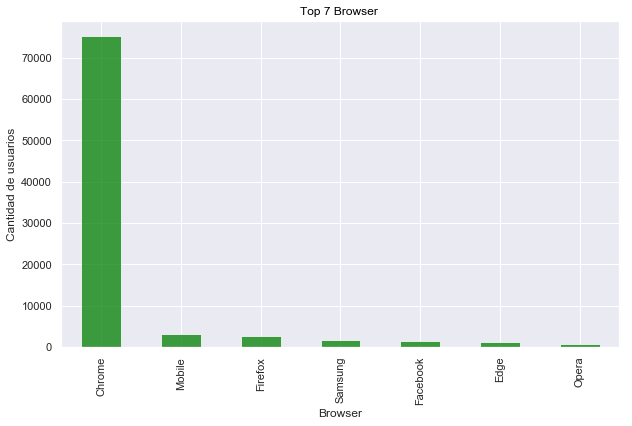

In [149]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Top 7 Browser ',color='black')

ax = browsers["browser_version"].map(lambda x: x.split(" ")[0]).value_counts()[0:7].plot(kind='bar', figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='green' )


ax.set_xlabel('Browser')
ax.set_ylabel("Cantidad de usuarios")
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('Top5skuns.png',bbox_inches='tight')




In [150]:
browsers["browser_version"] = browsers["browser_version"].map(lambda x: x.split(" ")[0]).map(lambda x: "Safari" if (x == "Mobile") else x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


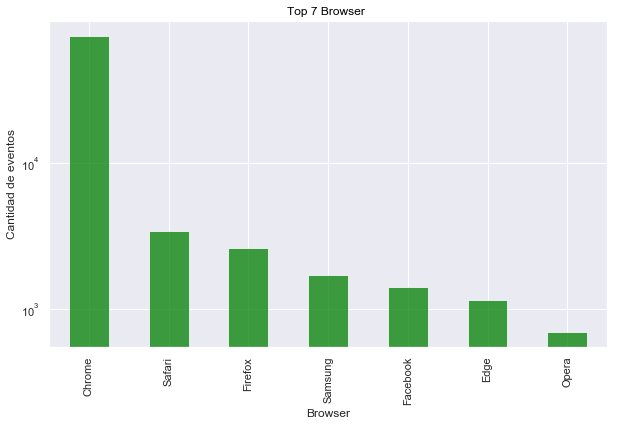

In [151]:
#Graficamos las 10 areas de trabajo que mas postulaciones reciben
f = plt.figure()

plt.title ('Top 7 Browser ',color='black')

ax = browsers["browser_version"].value_counts()[0:7].plot(kind='bar', figsize=(10,6) ,alpha=0.75, logy = True, ax=f.gca(), color='green' )


ax.set_xlabel('Browser')
ax.set_ylabel("Cantidad de eventos")
#plt.show()
#Exportamos el plot como .png para poder ponerlo en el informe
plt.savefig('Top5skuns.png',bbox_inches='tight')





In [152]:
browsers_device = browsers[["browser_version","device_type"]]

In [153]:
browsers_device = browsers_device[browsers_device["device_type"] != "Unknown"]

In [154]:
browsers_device["device_type"] = browsers_device["device_type"].map(lambda x: "Smartphone" if (x=="Tablet") else x)

In [155]:
browsers_device["device_type"].value_counts()

Smartphone    45473
Computer      41790
Name: device_type, dtype: int64

In [ ]:
browsers_device["count"] = 1
browsers_device.head()

In [ ]:
browsers_device = browsers_device[browsers_device["browser_version"].isin(["Chrome","Safari","Firefox","Samsung","Facebook","Edge","Opera"])]

In [ ]:
browsers_device = browsers_device.groupby(["browser_version","device_type"],as_index = False).count()

In [ ]:
import seaborn as sns

g = sns.barplot(x='browser_version', y='count', hue='device_type', data=browsers_device)
g.set_yscale('log')
plt.ylabel('Cantidad de eventos')
plt.xlabel('Browser')
g.legend(title = "Tipo de dispositivo")
plt.title('Cantidad de eventos por tipo de dispositivo y browser');

